In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline


# Load Dataset  
Load the training dataset from the `train.csv` file into a pandas DataFrame for further analysis and preprocessing.

In [4]:
db = pd.read_csv("train.csv")
db.head()


,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


# Data preprocessing
## Pre analysis
This initial analysis helps to understand the dataset's structure and detect potential outliers before applying any data transformations.

We removed the `id` column from the dataset as it serves only as an identifier and does not provide useful information for analysis.

In [5]:
db = db.drop(columns=['id'])
db.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,1


In [6]:
db.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,76.874071,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,8.994642,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,44.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,70.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,133.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


We checked for any missing values and duplicate rows.

In [7]:
db.isna().any().any()

np.False_

In [8]:
duplicated_rows = db[db.duplicated()]
print(duplicated_rows)

Empty DataFrame
Columns: [age, height(cm), weight(kg), waist(cm), eyesight(left), eyesight(right), hearing(left), hearing(right), systolic, relaxation, fasting blood sugar, Cholesterol, triglyceride, HDL, LDL, hemoglobin, Urine protein, serum creatinine, AST, ALT, Gtp, dental caries, smoking]
Index: []

[0 rows x 23 columns]


## Feature Creation
We created new features that capture important information from the dataset more effectively than the original attributes.

In [9]:
db['avg hearing'] = db[['hearing(left)', 'hearing(right)']].mean(axis=1)
db['avg eyesight'] = db[['eyesight(left)', 'eyesight(right)']].mean(axis=1)
db['BMI'] = db['weight(kg)'] / ((db['height(cm)'] / 100) ** 2)
db = db.drop(columns=['hearing(left)', 'hearing(right)', 'eyesight(left)', 'eyesight(right)', 'height(cm)', 'weight(kg)'])

print(db.head())

   age  waist(cm)  systolic  relaxation  fasting blood sugar  Cholesterol  \
0   55       81.0       135          87                   94          172   
1   70       89.0       146          83                  147          194   
2   20       81.0       118          75                   79          178   
3   35      105.0       131          88                   91          180   
4   30       80.5       121          76                   91          155   

   triglyceride  HDL  LDL  hemoglobin  Urine protein  serum creatinine  AST  \
0           300   40   75        16.5              1               1.0   22   
1            55   57  126        16.2              1               1.1   27   
2           197   45   93        17.4              1               0.8   27   
3           203   38  102        15.9              1               1.0   20   
4            87   44   93        15.4              1               0.8   19   

   ALT  Gtp  dental caries  smoking  avg hearing  avg eyesight

## Checking and Filtering Outliers  
We created boxplot graphs for each feature in the dataset to visually inspect and identify potential outliers.


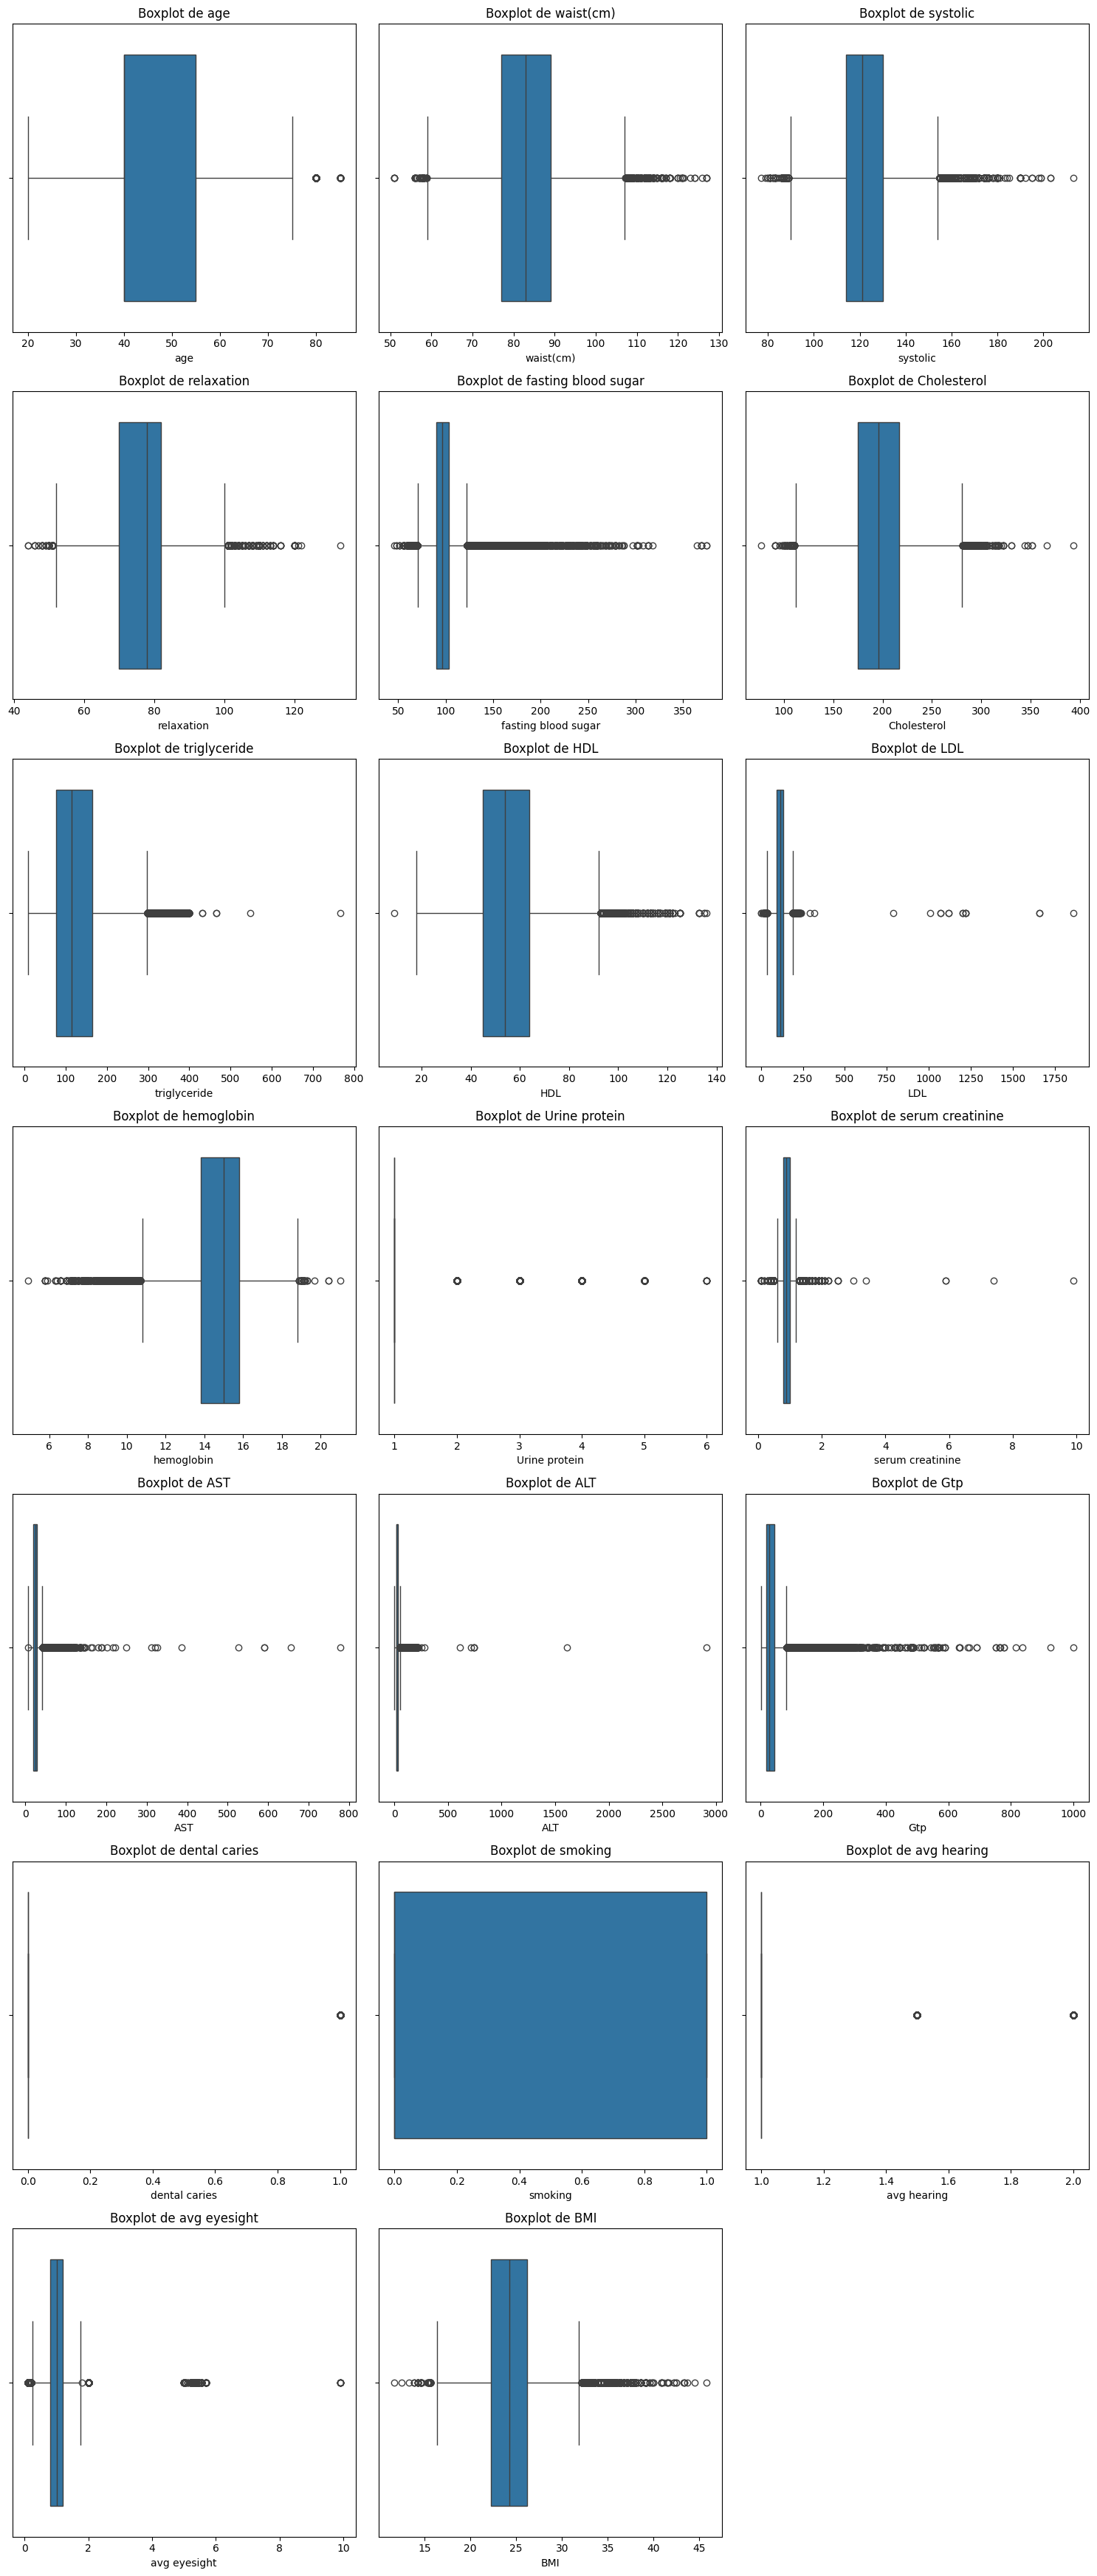

In [10]:
num_columns = len(db.select_dtypes(include='number').columns)

cols = 3 
rows = math.ceil(num_columns / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

axes = axes.flatten()

for i, column in enumerate(db.select_dtypes(include='number').columns):
    sb.boxplot(data=db, x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot de {column}')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Many abnormal values observed in the graphs can be explained by the fact that our dataset was generated by AI. We chose to remove only those with "avg eyesight" greater than or equal to 3.0, as it is physically impossible to have a value higher than this.

In [11]:
db = db[db["avg eyesight"] < 3.0]
print(db["avg eyesight"].max())

2.0


## Feature extraction
We want to find correlations between the numerical features. To do this, we compute and visualize the correlation matrix using a heatmap.



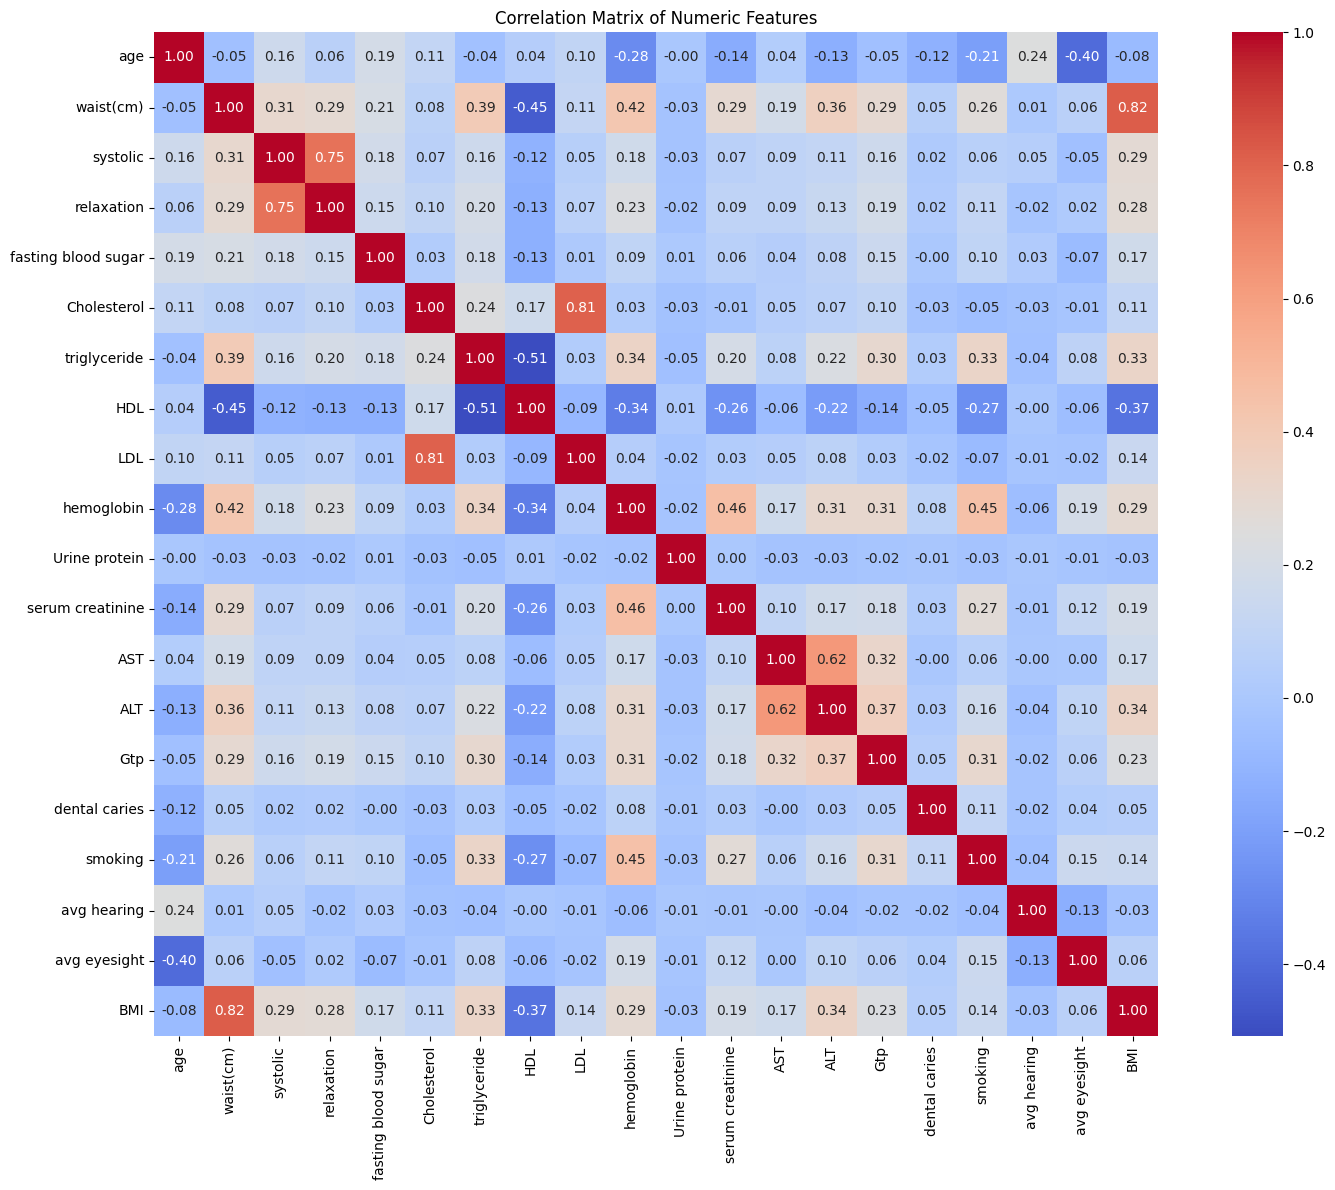

In [12]:
numeric_db = db.select_dtypes(include='number')

# 2. Compute correlation matrix
correlation_matrix = numeric_db.corr()

# 3. Plot the heatmap
plt.figure(figsize=(16, 12))
sb.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

We decided to drop the `waist(cm)` and `LDL` features, as they are highly correlated with the `BMI` and `Cholesterol` features, respectively.

This way, we can reduce the number of features, while still keeping (mostly) the same amount of information.

In [13]:
db = db.drop(columns=["waist(cm)", "LDL"])
db.head()

,age,systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,avg hearing,avg eyesight,BMI
0,55,135,87,94,172,300,40,16.5,1,1.0,22,25,27,0,1,1.0,0.55,22.038567
1,70,146,83,147,194,55,57,16.2,1,1.1,27,23,37,1,0,2.0,0.65,23.875115
2,20,118,75,79,178,197,45,17.4,1,0.8,27,31,53,0,1,1.0,0.45,25.951557
3,35,131,88,91,180,203,38,15.9,1,1.0,20,27,30,1,0,1.0,1.35,29.320988
4,30,121,76,91,155,87,44,15.4,1,0.8,19,13,17,0,1,1.0,1.25,22.038567


Finally, we plotted the correlation matrix to examine how each feature is numerically correlated with the `smoking` feature.

<Axes: >

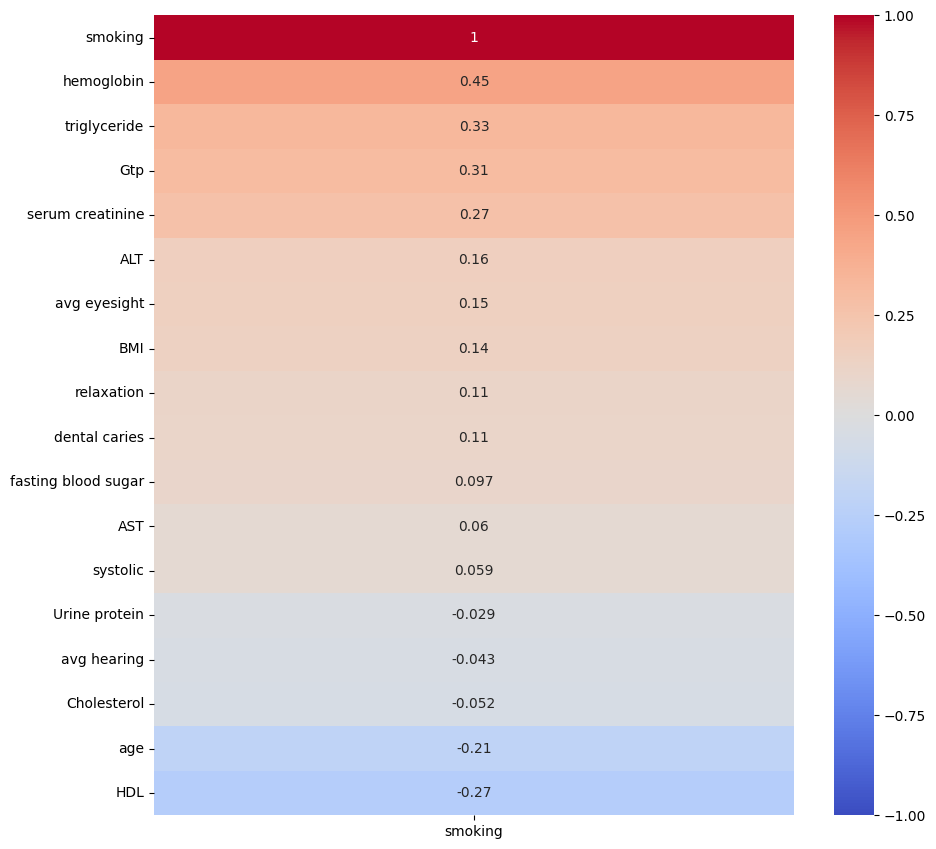

In [14]:
cols = list(db.columns)

plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

corr = db.corr()[['smoking']].sort_values(by='smoking', ascending=False)
sb.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Save Cleaned Dataset  
The cleaned dataset is saved to a new CSV file named `clean_data.csv`.


In [15]:
db.to_csv('clean_data.csv', index=False)

In [16]:
db = pd.read_csv('clean_data.csv')

# Prepare the dataset for model training


In [17]:
input_columns = list(db.drop('smoking', axis=1).columns)
all_inputs = db[input_columns].values
all_labels = db['smoking'].values
print(all_inputs[:5])

[[ 55.         135.          87.          94.         172.
  300.          40.          16.5          1.           1.
   22.          25.          27.           0.           1.
    0.55        22.03856749]
 [ 70.         146.          83.         147.         194.
   55.          57.          16.2          1.           1.1
   27.          23.          37.           1.           2.
    0.65        23.87511478]
 [ 20.         118.          75.          79.         178.
  197.          45.          17.4          1.           0.8
   27.          31.          53.           0.           1.
    0.45        25.95155709]
 [ 35.         131.          88.          91.         180.
  203.          38.          15.9          1.           1.
   20.          27.          30.           1.           1.
    1.35        29.32098765]
 [ 30.         121.          76.          91.         155.
   87.          44.          15.4          1.           0.8
   19.          13.          17.           0.          

## Split the dataset into train, validation and test sets
We splitted the dataset into 70% training, 20% test, and 10% validation sets. Stratified sampling was used to maintain the original class distribution across all subsets.

In [18]:


train_inputs, val_test_inputs, train_labels, val_test_labels = train_test_split(
    all_inputs, all_labels,
    test_size=0.30,
    stratify=all_labels,
    random_state=1
)

val_inputs, test_inputs, val_labels, test_labels = train_test_split(
    val_test_inputs, val_test_labels,
    test_size=2/3,
    stratify=val_test_labels,
    random_state=1
)

print(f'Train: {len(train_inputs)}, Test: {len(test_inputs)}, Validation: {len(val_inputs)}')

Train: 111310, Test: 31804, Validation: 15901


# Model Training  
## Decision Trees  
The first time we trained a decision tree model, we were a bit disappointed with the results—66.8% accuracy on the test and validation sets. However, after some research, we learned that decision tree models often suffer from overfitting. This was evident in our case, as the model achieved 100% accuracy on the training set. The model learned the data too well, which reduces its ability to generalize to new, unseen data.


In [19]:


clf = DecisionTreeClassifier(random_state=1)

clf.fit(train_inputs, train_labels)



pred = clf.predict(val_inputs)
val_accuracy = accuracy_score(val_labels, pred)

pred = clf.predict(test_inputs)
test_accuracy = accuracy_score(test_labels, pred)

pred = clf.predict(train_inputs)
train_accuracy = accuracy_score(train_labels, pred)

print(f"Train accuracy: {train_accuracy:.3f}")
print(f"Validation accuracy: {val_accuracy:.3f}")
print(f"Test accuracy: {test_accuracy:.3f}")

Train accuracy: 1.000
Validation accuracy: 0.682
Test accuracy: 0.682


In order to avoid overfitting, we performed a grid search to find the hyperparameters that allow the model to perform best.

In [20]:
clf = DecisionTreeClassifier(random_state=1)
cross_validation = StratifiedKFold(n_splits=5)
param_grid = {
    
    'max_depth': [3, 7, 11, 14, None],      
    'max_features': [3, 7, 11, 14, None]
}
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv = cross_validation, 
    n_jobs=-1
)

grid_search.fit(train_inputs, train_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))




Best score: 0.7472374449734974
Best parameters: {'max_depth': 7, 'max_features': None}


We used the best estimator found through grid search, and the model no longer showed signs of overfitting.  
We also got some metrics—accuracy, precision, recall, F1-score and confusion matrix— to provide a comprehensive evaluation of the model’s generalization performance.


In [21]:
clf=grid_search.best_estimator_

pred = clf.predict(train_inputs)
train_accuracy = accuracy_score(train_labels, pred)

pred = clf.predict(val_inputs)
val_accuracy = accuracy_score(val_labels, pred)

pred = clf.predict(test_inputs)
test_accuracy = accuracy_score(test_labels, pred)

precision = precision_score(test_labels, pred, average='binary')  
recall = recall_score(test_labels, pred, average='binary')
f1 = f1_score(test_labels, pred, average='binary')

print(f"Train accuracy: {train_accuracy:.3f}")
print(f"Validation accuracy: {val_accuracy:.3f}")
print(f"Test accuracy: {test_accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-score:  {f1:.3f}")

Train accuracy: 0.755
Validation accuracy: 0.751
Test accuracy: 0.747
Precision: 0.683
Recall:    0.786
F1-score:  0.731


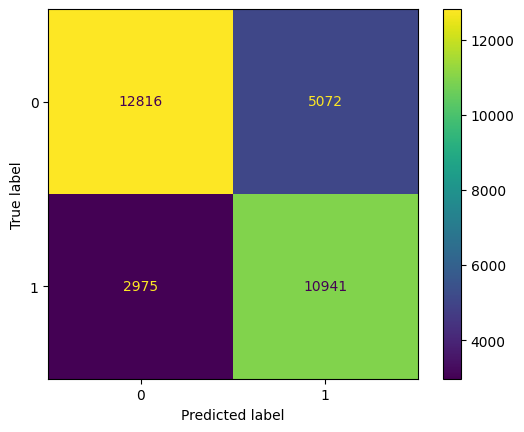

In [22]:
cm = confusion_matrix(test_labels, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## RandomForest

We tried to improve our results from the decision tree by training a Random Forest model. When training with the default parameters, the model still showed signs of overfitting, but it achieved better accuracy compared to the decision tree. <br>
Random Forests, while being more robust than single decision trees, can still overfit, especially when composed of deep trees. However, due to their ensemble nature, they tend to generalize better and usually achieve higher test accuracy than decision tree models.

In [23]:
rf = RandomForestClassifier(

    n_jobs=-1,
    random_state=1
)

rf.fit(train_inputs, train_labels)

train_preds = rf.predict(train_inputs)
val_preds = rf.predict(val_inputs)
test_preds = rf.predict(test_inputs)

train_acc = accuracy_score(train_labels, train_preds)
val_acc = accuracy_score(val_labels,val_preds)
test_acc = accuracy_score(test_labels, test_preds)

print(f"Train accuracy: {train_acc:.3f}")
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Test accuracy: {test_acc:.3f}")

Train accuracy: 1.000
Validation accuracy: 0.772
Test accuracy: 0.767


We used grid search to find the best hyperparameters in order to reduce overfitting and potentially improve the model's accuracy.

In [24]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [ 5, 10],
    'min_samples_leaf': [10, 20, 50],        
    'max_features': ['sqrt', 'log2']
}
rf = RandomForestClassifier(random_state=1)
cross_validation = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=1),
    param_grid=param_grid,
    cv = cross_validation, 
    n_jobs=-1,
    verbose=4
)
grid_search.fit(train_inputs, train_labels)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))



Fitting 5 folds for each of 72 candidates, totalling 360 fits


KeyboardInterrupt: 

The accuracy of the best estimator was nearly the same, but the model no longer suffered from overfitting.
We also computed the same performance metrics to better understand the model's behavior and allow a fair comparison with the other models.

In [ ]:
rf = grid_search.bestestimator

train_pred = rf.predict(train_inputs)
val_pred = rf.predict(val_inputs)
test_pred = rf.predict(test_inputs)

train_accuracy = accuracy_score(train_labels, train_pred)
val_accuracy = accuracy_score(val_labels, val_pred)
test_accuracy = accuracy_score(test_labels, test_pred)
precision = precision_score(test_labels, test_pred, average='binary')
recall = recall_score(test_labels, test_pred, average='binary')
f1 = f1_score(test_labels, test_pred, average='binary')

print(f"Train Accuracy:  {train_accuracy:.3f}")
print(f"Validation Accuracy:  {val_accuracy:.3f}")
print(f"Test Accuracy:  {test_accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-score:  {f1:.3f}")

Accuracy:  0.769
Precision: 0.711
Recall:    0.796
F1-score:  0.751


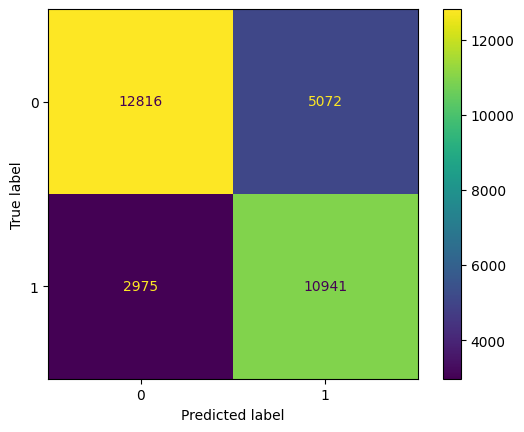

In [ ]:
cm = confusion_matrix(test_labels, test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# XGBoost


We then trained a XGBoost model using its default parameters to evaluate its initial performance. Unlike the Random Forest Model, the XGBoost model did not show clear signs of overfitting, achieving consistent accuracy across the training (81.8%), validation (77.9%), and test (77.7%) datasets. This suggests that even without hyperparameter tuning, XGBoost is better at generalizing than Random Forest.

In [ ]:
xgb_model = XGBClassifier(random_state= 1)
xgb_model.fit(train_inputs, train_labels)

xgb_preds = xgb_model.predict(val_inputs)
xgb_accuracy = accuracy_score(val_labels, xgb_preds)

xgb_test_preds = xgb_model.predict(test_inputs)
xgb_test_accuracy = accuracy_score(test_labels, xgb_test_preds)

xgb_train_preds = xgb_model.predict(train_inputs)
xgb_train_accuracy = accuracy_score(train_labels, xgb_train_preds)

print(f"Train accuracy: {xgb_train_accuracy:.3f}")
print(f"Validation accuracy: {xgb_accuracy:.3f}")
print(f"Test accuracy: {xgb_test_accuracy:.3f}")


Train accuracy: 0.818
Validation accuracy: 0.779
Test accuracy: 0.777


Although the initial model already showed good generalization, we applied a grid search to fine-tune the hyperparameters and further improve performance.

In [ ]:
xgb = XGBClassifier(eval_metric='logloss')

param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2]
}

cross_validation = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=cross_validation,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(train_inputs, train_labels)

print(f"Best score: {grid_search.best_score_:.3f}")
print(f"Best parameters: {grid_search.best_params_}")


Best score: 0.776
Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}


We used the best estimator found through grid search, and the XGBoost model continued to show no signs of overfitting.
We also collected key metrics—accuracy, precision, recall, F1-score, and confusion matrix—to evaluate the model’s generalization performance more thoroughly.

In [ ]:
xgb_best = grid_search.best_estimator_

xgb_train_preds = xgb_best.predict(train_inputs)
xgb_val_preds = xgb_best.predict(val_inputs)
xgb_test_preds = xgb_best.predict(test_inputs)

train_accuracy = accuracy_score(train_labels, xgb_train_preds)
val_accuracy = accuracy_score(val_labels, xgb_val_preds)
test_accuracy = accuracy_score(test_labels, xgb_test_preds)

precision = precision_score(test_labels, xgb_test_preds)
recall = recall_score(test_labels, xgb_test_preds)
f1 = f1_score(test_labels, xgb_test_preds)

print(f"Train accuracy: {train_accuracy:.3f}")
print(f"Validation accuracy: {val_accuracy:.3f}")
print(f"Test accuracy: {test_accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")


Train accuracy: 0.802
Validation accuracy: 0.782
Test accuracy: 0.778
Precision: 0.720
Recall: 0.807
F1-score: 0.761


Overall, based on the results above, the model became less prone to overfitting and better at generalizing to unseen data. <br>
To further analyze the model's classification performance, we plotted the confusion matrix using the predictions on the test set. This helps us understand how well the model distinguishes between the two target classes.

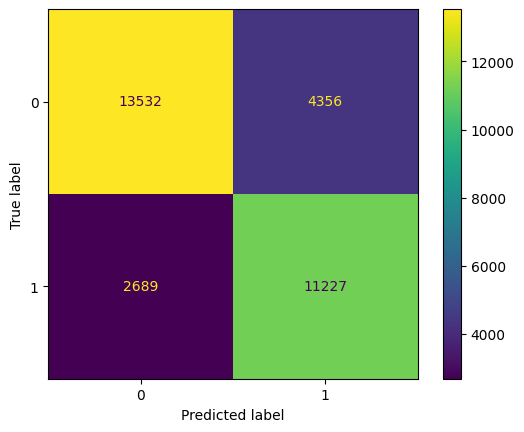

In [ ]:
cm = confusion_matrix(test_labels, xgb_test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


To further evaluate the classifier’s performance, we plotted the ROC (Receiver Operating Characteristic) curve. This curve illustrates the model’s ability to distinguish between the two classes at various threshold settings, by showing the trade-off between the true positive rate (sensitivity) and the false positive rate.

In our case, the ROC curve bends strongly towards the top-left corner, indicating good discriminative power. The AUC (Area Under the Curve) value of 0.86 confirms this, as values closer to 1.0 reflect better classification performance.

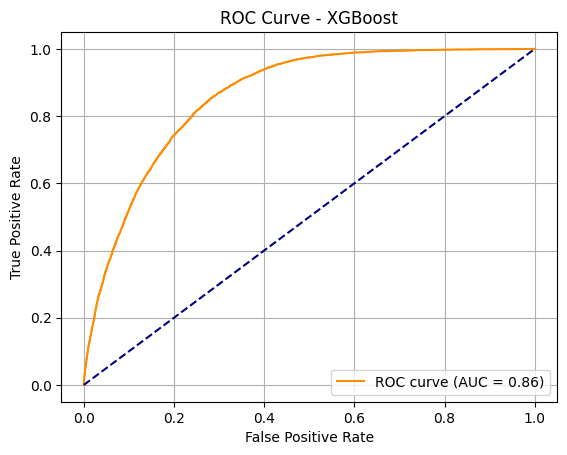

In [ ]:
xgb_probs = xgb_best.predict_proba(test_inputs)[:, 1]
fpr, tpr, thresholds = roc_curve(test_labels, xgb_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.grid()
plt.show()

To better understand the model’s learning behavior, we plotted a learning curve showing how the training and validation accuracy evolve as the training set size increases.

The learning curve shows that as the training set size increases, the training accuracy slightly decreases while the validation accuracy gradually increases and stabilizes. The gap between training and validation accuracy indicates that while the model is not severely overfitting, there is still some room for improvement in generalization.

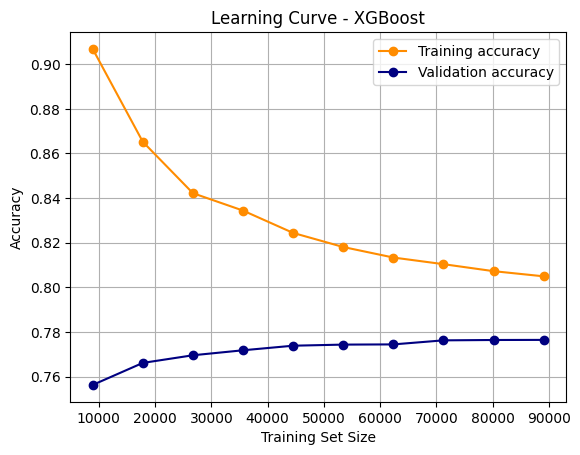

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(
    xgb_best, train_inputs, train_labels, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='darkorange', label='Training accuracy')
plt.plot(train_sizes, val_scores_mean, 'o-', color='navy', label='Validation accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - XGBoost')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
scaler = StandardScaler()
scaler.fit(train_inputs)

train_inputs_scaled = scaler.transform(train_inputs)
val_inputs_scaled = scaler.transform(val_inputs)
test_inputs_scaled = scaler.transform(test_inputs)

mlp = MLPClassifier(random_state=1)

mlp.fit(train_inputs_scaled, train_labels)

train_preds = mlp.predict(train_inputs_scaled)
val_preds = mlp.predict(val_inputs_scaled)
test_preds = mlp.predict(test_inputs_scaled)

print(f"Train accuracy: {accuracy_score(train_labels, train_preds):.3f}")
print(f"Validation accuracy: {accuracy_score(val_labels, val_preds):.3f}")
print(f"Test accuracy: {accuracy_score(test_labels, test_preds):.3f}")

Train accuracy: 0.776
Validation accuracy: 0.771
Test accuracy: 0.768


In [ ]:
# Define a pipeline to include scaling and the model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=300, random_state=1))
])

# Define the parameter grid
param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__learning_rate_init': [0.001, 0.01, 0.1],
    'mlp__alpha': [0.0001, 0.001],  # L2 regularization
}

# Set up cross-validation strategy
cross_validation = StratifiedKFold(n_splits=5)

# Run Grid Search
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cross_validation,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit to the training data
grid_search.fit(train_inputs, train_labels)

# Output results
print(f"Best score: {grid_search.best_score_:.3f}")
print(f"Best parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best score: 0.767
Best parameters: {'mlp__activation': 'tanh', 'mlp__alpha': 0.001, 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate_init': 0.001}


In [27]:
mlp_best = grid_search.best_estimator_

mlp_train_preds = mlp_best.predict(train_inputs)
mlp_val_preds = mlp_best.predict(val_inputs)
mlp_test_preds = mlp_best.predict(test_inputs)

mlp_train_accuracy = accuracy_score(train_labels, mlp_train_preds)
mlp_val_accuracy = accuracy_score(val_labels, mlp_val_preds)
mlp_test_accuracy = accuracy_score(test_labels, mlp_test_preds)

mlp_precision = precision_score(test_labels, mlp_test_preds)
mlp_recall = recall_score(test_labels, mlp_test_preds)
mlp_f1 = f1_score(test_labels, mlp_test_preds)

print(f"MLP Train accuracy: {mlp_train_accuracy:.3f}")
print(f"MLP Validation accuracy: {mlp_val_accuracy:.3f}")
print(f"MLP Test accuracy: {mlp_test_accuracy:.3f}")
print(f"MLP Precision: {mlp_precision:.3f}")
print(f"MLP Recall: {mlp_recall:.3f}")
print(f"MLP F1-score: {mlp_f1:.3f}")

MLP Train accuracy: 0.774
MLP Validation accuracy: 0.772
MLP Test accuracy: 0.768
MLP Precision: 0.708
MLP Recall: 0.801
MLP F1-score: 0.752


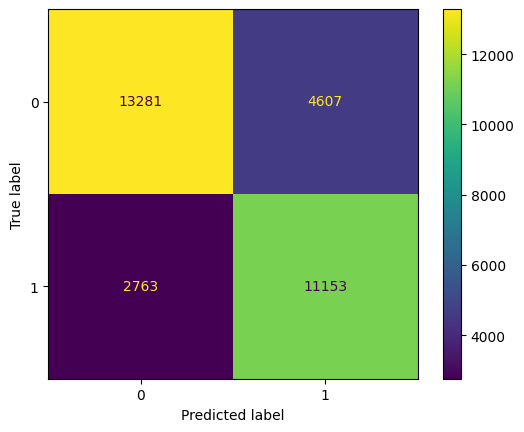

In [28]:
mlp_cm = confusion_matrix(test_labels, mlp_test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=mlp_cm)
disp.plot()

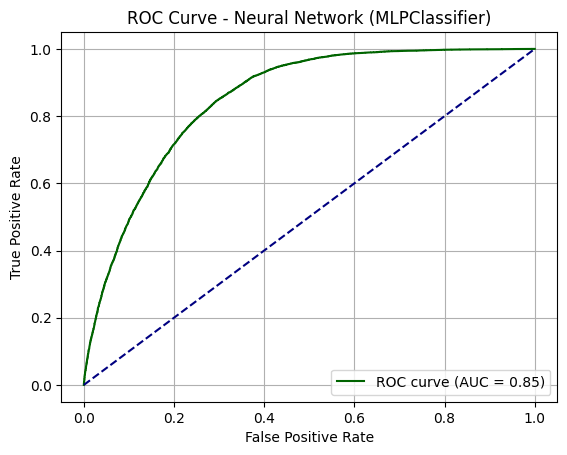

In [30]:
mlp_probs = mlp_best.predict_proba(test_inputs)[:, 1]

fpr, tpr, thresholds = roc_curve(test_labels, mlp_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkgreen', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network (MLPClassifier)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

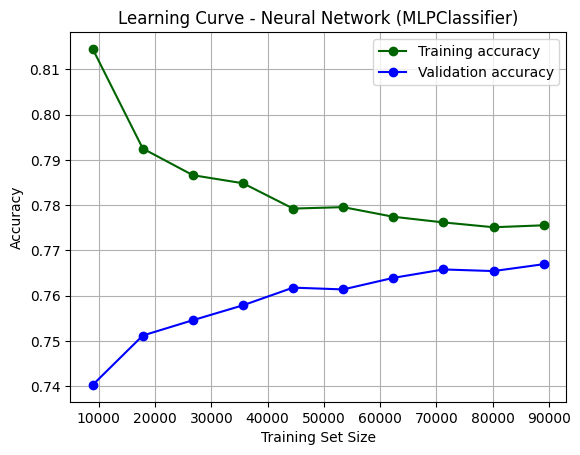

In [31]:
train_sizes, train_scores, val_scores = learning_curve(
    mlp_best, train_inputs, train_labels, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='darkgreen', label='Training accuracy')
plt.plot(train_sizes, val_scores_mean, 'o-', color='blue', label='Validation accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Neural Network (MLPClassifier)')
plt.legend(loc='best')
plt.grid()
plt.show()